In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data_penjualan.csv')

In [7]:
print("Nama Kolom:", data.columns.tolist())
print(data.head())

Nama Kolom: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel

5W + 1H

In [17]:
# 1. What (Apa yang terjual?)
# Produk yang paling banyak terjual
product_col = 'Product line'
most_sold_product = data[product_col].value_counts().idxmax()
print(f"Produk yang paling banyak terjual: {most_sold_product}")

Produk yang paling banyak terjual: Fashion accessories


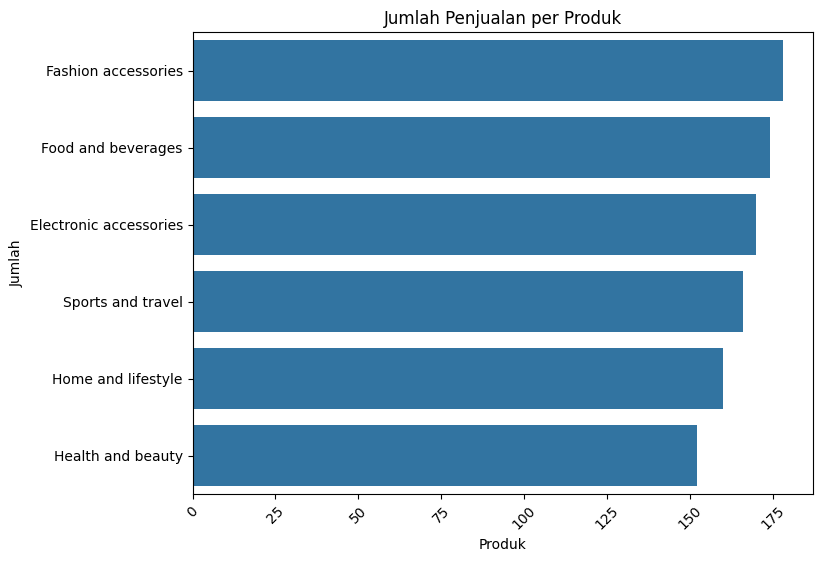

In [18]:
# Visualisasi Produk Terlaris
plt.figure(figsize=(8, 6))
sns.countplot(data[product_col], order=data[product_col].value_counts().index)
plt.title('Jumlah Penjualan per Produk')
plt.xlabel('Produk')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [19]:
# 2. Who (Siapa yang membeli?)
# Pelanggan dengan pembelian terbanyak
customer_col = 'Customer type'
top_customer = data[customer_col].value_counts().idxmax()
print(f"Tipe pelanggan yang paling banyak melakukan pembelian: {top_customer}")

Tipe pelanggan yang paling banyak melakukan pembelian: Member


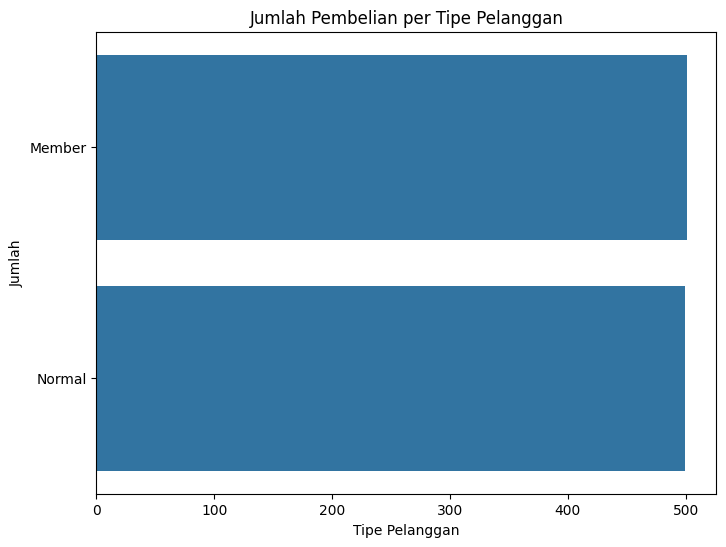

In [20]:
# Visualisasi Tipe Pelanggan
plt.figure(figsize=(8, 6))
sns.countplot(data[customer_col])
plt.title('Jumlah Pembelian per Tipe Pelanggan')
plt.xlabel('Tipe Pelanggan')
plt.ylabel('Jumlah')
plt.show()

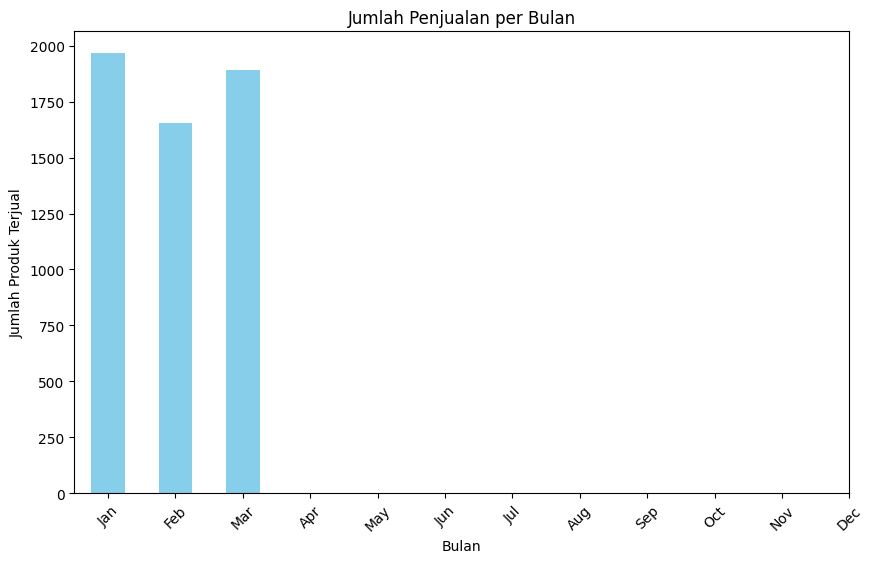

In [23]:
# 3. When (Kapan terjual?)
# Jumlah penjualan per bulan
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

plt.figure(figsize=(10, 6))
data.groupby('Month')['Quantity'].sum().plot(kind='bar', color='skyblue')
plt.title('Jumlah Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

Kota dengan penjualan terbanyak: Yangon


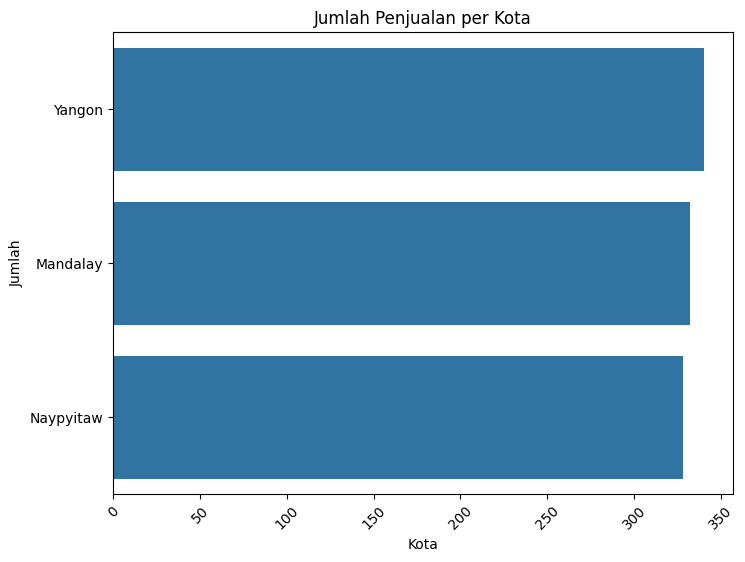

In [24]:
# 4. Where (Di mana terjual?)
# Kota dengan penjualan terbanyak
city_col = 'City'
top_city = data[city_col].value_counts().idxmax()
print(f"Kota dengan penjualan terbanyak: {top_city}")

# Visualisasi Penjualan per Kota
plt.figure(figsize=(8, 6))
sns.countplot(data[city_col], order=data[city_col].value_counts().index)
plt.title('Jumlah Penjualan per Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

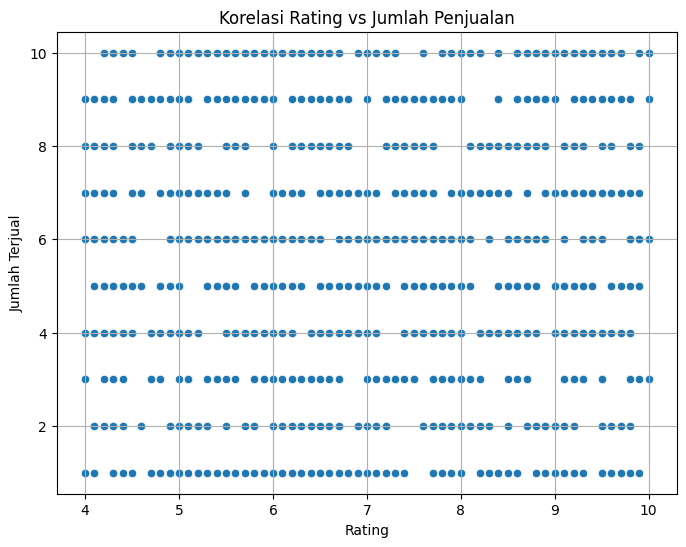

In [25]:
# 5. Why (Mengapa terjual?)
# Analisis ini bisa dilakukan dengan melihat hubungan antara rating dan jumlah penjualan
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Quantity', data=data)
plt.title('Korelasi Rating vs Jumlah Penjualan')
plt.xlabel('Rating')
plt.ylabel('Jumlah Terjual')
plt.grid(True)
plt.show()

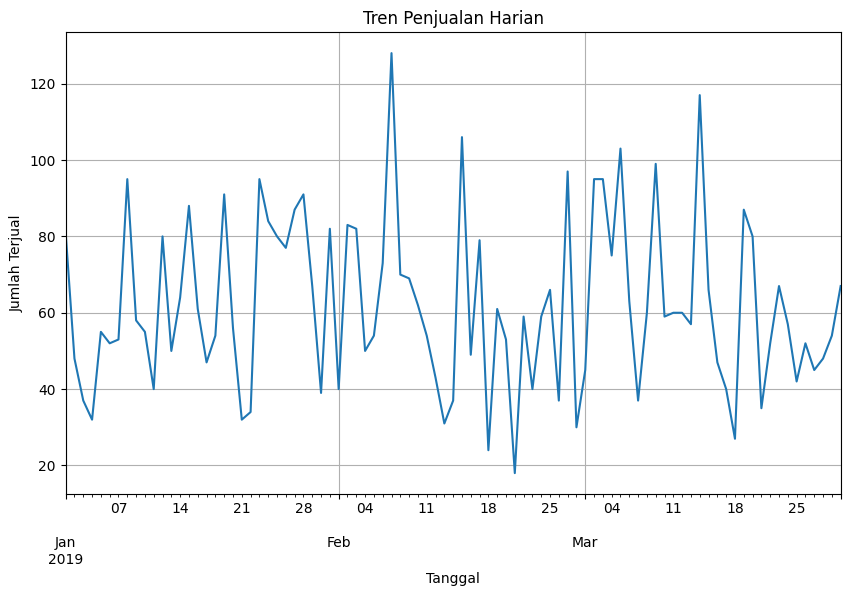

In [26]:
# 6. How (Bagaimana pola penjualan?)
# Visualisasi tren penjualan berdasarkan waktu
plt.figure(figsize=(10, 6))
data.groupby('Date')['Quantity'].sum().plot()
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Terjual')
plt.grid(True)
plt.show()